In [299]:
import sys
import os 
import numpy as np
import pandas as pd
import seaborn as sb
import random
import itertools
import math
import copy
import matplotlib.pyplot as plt

In [71]:
df_data = pd.read_csv('/home/yakaboskic/courses/engs103Project/data/dart-grad-data-clean.csv')
df_data = df_data.dropna()
df_data.head()

,LO Street1,LO City,LO State,LO Zip
0,705 Canaan St.,Canaan,NH,03741
1,392 Jones Hill Road,Canaan,NH,03741
2,9 Roberts Rd. #202,Canaan,NH,03741
3,161 Smith Pond Road,Enfield,NH,03748
4,153 Shaker Hill Road #1,Enfield,NH,03748


In [72]:
df_data['LO City'].unique()
sachem_roads = ['Sachem', 'Drake', 'Gould', 'Haddock', 'Ralston']

In [73]:
city = df_data['LO City']
street = df_data['LO Street1']
h1 = ~city.str.contains('HANOVER')
h2 = ~city.str.contains('hanover')
h3 = ~city.str.contains('Hanvoer')
leb1 = ~city.str.contains('LEBANON')
wleb1 = ~city.str.contains('West Labanon')
wleb2 = ~city.str.contains('West Leb')
wleb3 = ~city.str.contains('WEST LEBANNON')
wleb4 = ~city.str.contains('West lebanon')
wleb5 = ~city.str.contains('west lebanon')
wrj1 = ~city.str.contains('White River Jct')
wrj2 = ~city.str.contains('white river junction')
sachem = ~street.str.contains('|'.join(sachem_roads))

In [74]:
df_data['LO City'] = df_data['LO City'].where(h1, 'Hanover')
df_data['LO City'] = df_data['LO City'].where(h2, 'Hanover')
df_data['LO City'] = df_data['LO City'].where(h3, 'Hanover')
df_data['LO City'] = df_data['LO City'].where(leb1, 'Lebanon')
df_data['LO City'] = df_data['LO City'].where(wleb1, 'West Lebanon')
df_data['LO City'] = df_data['LO City'].where(wleb2, 'West Lebanon')
df_data['LO City'] = df_data['LO City'].where(wleb3, 'West Lebanon')
df_data['LO City'] = df_data['LO City'].where(wleb4, 'West Lebanon')
df_data['LO City'] = df_data['LO City'].where(wleb5, 'West Lebanon')
df_data['LO City'] = df_data['LO City'].where(wrj1, 'White River Junction')
df_data['LO City'] = df_data['LO City'].where(wrj2, 'White River Junction')
df_data['LO City'] = df_data['LO City'].where(sachem, 'Sachem')

In [75]:
df_data['LO City'].unique()

array(['Canaan', 'Enfield', 'Etna', 'Hanover', 'Sachem', 'Hartford',
       'Hartland', 'Hoboken', 'Lebanon', 'Lyme', 'Norwich',
       'West Lebanon', 'White River Junction'], dtype=object)

In [82]:
stops = ['Enfield', 'Sachem', 'Lebanon', 'Norwich', 'West Lebanon', 'White River Junction']

In [149]:
df_stopOnly = df_data[df_data['LO City'].isin(stops)]

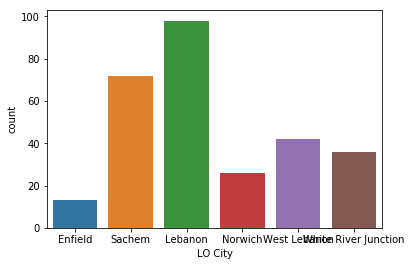

In [330]:
sb.countplot(x='LO City', data=df_stopOnly)

In [328]:
total = df_stopOnly['LO City'].count()
stats = df_stopOnly['LO City'].value_counts()/total
print(df_stopOnly['LO City'].value_counts())
print(stats)

Lebanon                 98
Sachem                  72
West Lebanon            42
White River Junction    36
Norwich                 26
Enfield                 13
Name: LO City, dtype: int64
Lebanon                 0.341463
Sachem                  0.250871
West Lebanon            0.146341
White River Junction    0.125436
Norwich                 0.090592
Enfield                 0.045296
Name: LO City, dtype: float64


In [97]:
def city_rand():
    rand = random.random()
    start = 0
    end = stats.Lebanon
    if rand <= end:
        return 'Lebanon'
    start = end
    end = start + stats.Sachem
    if rand > start and rand <= end:
        return 'Sachem'
    start = end
    end = start + stats['West Lebanon']
    if rand > start and rand <= end:
        return 'West Lebanon'
    start = end
    end = start + stats['White River Junction']
    if rand > start and rand <= end:
        return 'White River Junction'
    start = end
    end = start + stats.Norwich
    if rand > start and rand <= end:
        return 'Norwich'
    start = end
    end = start + stats['Enfield']
    if rand > start and rand <= end:
        return 'Enfield'
    else:
        return 'Issue'

In [161]:
df_dist = pd.read_csv('/home/yakaboskic/courses/engs103Project/data/UpperValleyDists.csv')
df_dist = df_dist.set_index('Unnamed: 0')
df_dist = df_dist.fillna(0)
df_dist

,Hanover,Lebanon,West Lebanon,Norwich,White River Junction,Wilder,Sachem,Enfield
Unnamed: 0,,,,,,,,
Hanover,0.0,5.7,4.3,1.6,4.5,4.0,1.6,10.8
Lebanon,5.7,0.0,3.6,7.5,4.5,5.9,7.0,6.7
West Lebanon,4.3,3.6,0.0,5.6,1.0,2.4,3.6,10.7
Norwich,1.6,7.5,5.6,0.0,5.2,3.5,3.2,12.8
White River Junction,4.5,4.5,1.0,5.2,0.0,1.9,3.8,11.5
Wilder,4.0,5.9,2.4,3.5,1.9,0.0,5.2,15.2
Sachem,1.6,7.0,3.6,3.2,3.8,5.2,0.0,12.3
Enfield,10.8,6.7,10.7,12.8,11.5,15.2,12.3,0.0


In [162]:
def get_tsp_trip(stops):
    start = 'Hanover'
    end = 'Hanover'
    distance_results = []
    stops = set(stops)
    for perm in itertools.permutations(stops, r=len(stops)):
        tour = list(perm)
        tour.insert(0, 'Hanover')
        tour.append('Hanover')
        distance = 0
        start = 'Hanover'
        for stop in tour:
            distance = distance + df_dist.loc[start, stop]
            start = stop
        distance_results.append([distance, tour])
    return sorted(distance_results)[0]

In [163]:
get_tsp_trip(['White River Junction', 'Norwich',  'Enfield'])

[29.1, ['Hanover', 'Enfield', 'White River Junction', 'Norwich', 'Hanover']]

In [288]:
AVG_MILES_HR = 20
AVG_ARRIVALS_HR = 4
AVG_STOP_TIME = 1
MPG = 15
GAS_PRICE_GALLON = 3
DEPRECIATION = 30000/100000
COST_PER_MILE = GAS_PRICE_GALLON/MPG + DEPRECIATION

def simulation(runs=100):
    results = []
    for run in range(runs):
        I = 0
        N = 0
        t = 0
        t_l = 240
        t_ss = 999
        t_sf = 999
        t_nc = np.random.exponential((1/AVG_ARRIVALS_HR)*60)
        j = 0
        Q = []
        cost = 0
        wait_times = []
        while t < t_l:
            t = min(t_l, t_ss, t_sf, t_nc)
            #print(t)
            if t == t_nc:
                j = j + 1
                t_j = copy.deepcopy(t)
                #print('New customer in line at time:', t_j)
                tour = get_tsp_trip([city_rand() for i in range(0, random.randint(1,4))])
                #print(tour)
                Q.append((t_j, tour))
                if N == 0:
                    t_ss = t
                else:
                    I = I + 1
                t_nc = t + np.random.exponential((1/AVG_ARRIVALS_HR)*60)
                #print('Next Group arriving at:', t_nc)
                continue
            elif t == t_ss:
                q = Q.pop(0)
                #print('Servicing Customer that came at:', q[0])
                cost += q[1][0]*COST_PER_MILE
                wait_times.append(t - q[0])
                N = 1
                I = max(0, I - 1)
                t_sf = t + (q[1][0]/AVG_MILES_HR)*60 + AVG_STOP_TIME
                #print('Back in Hanover at:', t_sf)
                t_ss = 999
                continue
            elif t == t_sf:
                #print('Back in Hanover')
                if I > 0:
                    t_ss = t
                    #print('Start of Next Service:', t_ss)
                N = 0 
                t_sf = 999
            else:
                break
        results.append([cost, wait_times])
    return results

In [289]:
results = simulation(10000)

In [334]:
lambdas = range(1, 35, 1)
r = []
for lamb in lambdas:
    lamb = lamb/2
    AVG_ARRIVALS_HR = lamb
    results = simulation(100)
    avg_cost = np.average([entry[0] for entry in results])
    avg_waitTime = np.average([np.average(entry[1]) for entry in results])
    avg_served = np.average([len(entry[1]) for entry in results])
    r.append([lamb, avg_cost, avg_waitTime, avg_served*2, avg_cost*avg_served])    

/home/yakaboskic/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/yakaboskic/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [335]:
data = pd.DataFrame(r)
data = data.fillna(0)
data.columns = ['lambda (Groups per hour)', 'Average Cost Per Trip', 
                'Average Wait Time', 'Average Customers Served', 'Average Cost Per Night']
data.head()

,lambda (Groups per hour),Average Cost Per Trip,Average Wait Time,Average Customers Served,Average Cost Per Night
0,0.5,11.4970,0.000000,3.48,20.00478
1,1.0,22.8385,13.247390,7.08,80.84829
2,1.5,28.8180,21.970965,9.12,131.41008
3,2.0,34.0540,34.215062,10.32,175.71864
4,2.5,37.0280,45.983540,10.82,200.32148


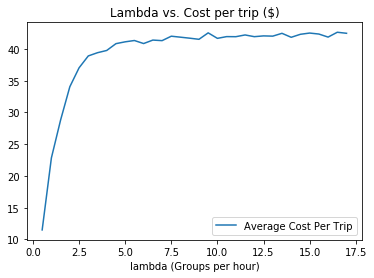

In [336]:
data.plot(x=0, y=1, kind='line', title='Lambda vs. Cost per trip ($)')

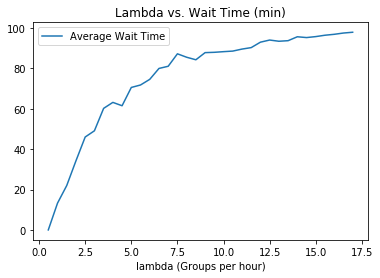

In [337]:
data.plot(x=0, y=2, kind='line', title='Lambda vs. Wait Time (min)')

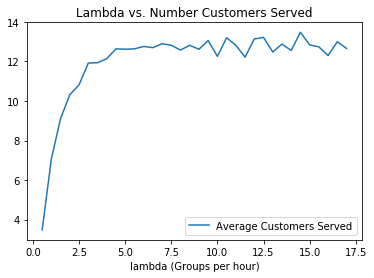

In [338]:
data.plot(x=0, y=3, kind='line', title='Lambda vs. Number Customers Served')

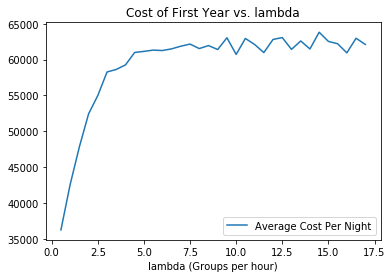

In [352]:
van_cost = 30000
hours_per_day = 4
days = 2*52
total_hours = hours_per_day*days
salary = 10
total_salary = salary*total_hours
data_yearly = data.iloc[:,[0,-1]]
data_yearly.iloc[:,1] = data_yearly.iloc[:,1]*days + total_salary + van_cost
data_yearly.plot(x=0, y=1, kind='line', title='Cost of First Year vs. lambda')